In [1]:
import numpy as np
import pandas as pd
import suncalc
from scipy import stats
import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import colors
import soundfile as sf
import matplotlib.patches as patches
from pathlib import Path

In [2]:
import sys

sys.path.append("../src")
sys.path.append("../src/activity")

In [3]:
from core import SITE_NAMES, FREQ_GROUPS, SEATTLE_LATITUDE, SEATTLE_LONGITUDE, DC_COLOR_MAPPINGS
from cli import get_file_paths

import subsampling as ss
import plot
import pipeline
import activity_assembly as actvt

Telephone 


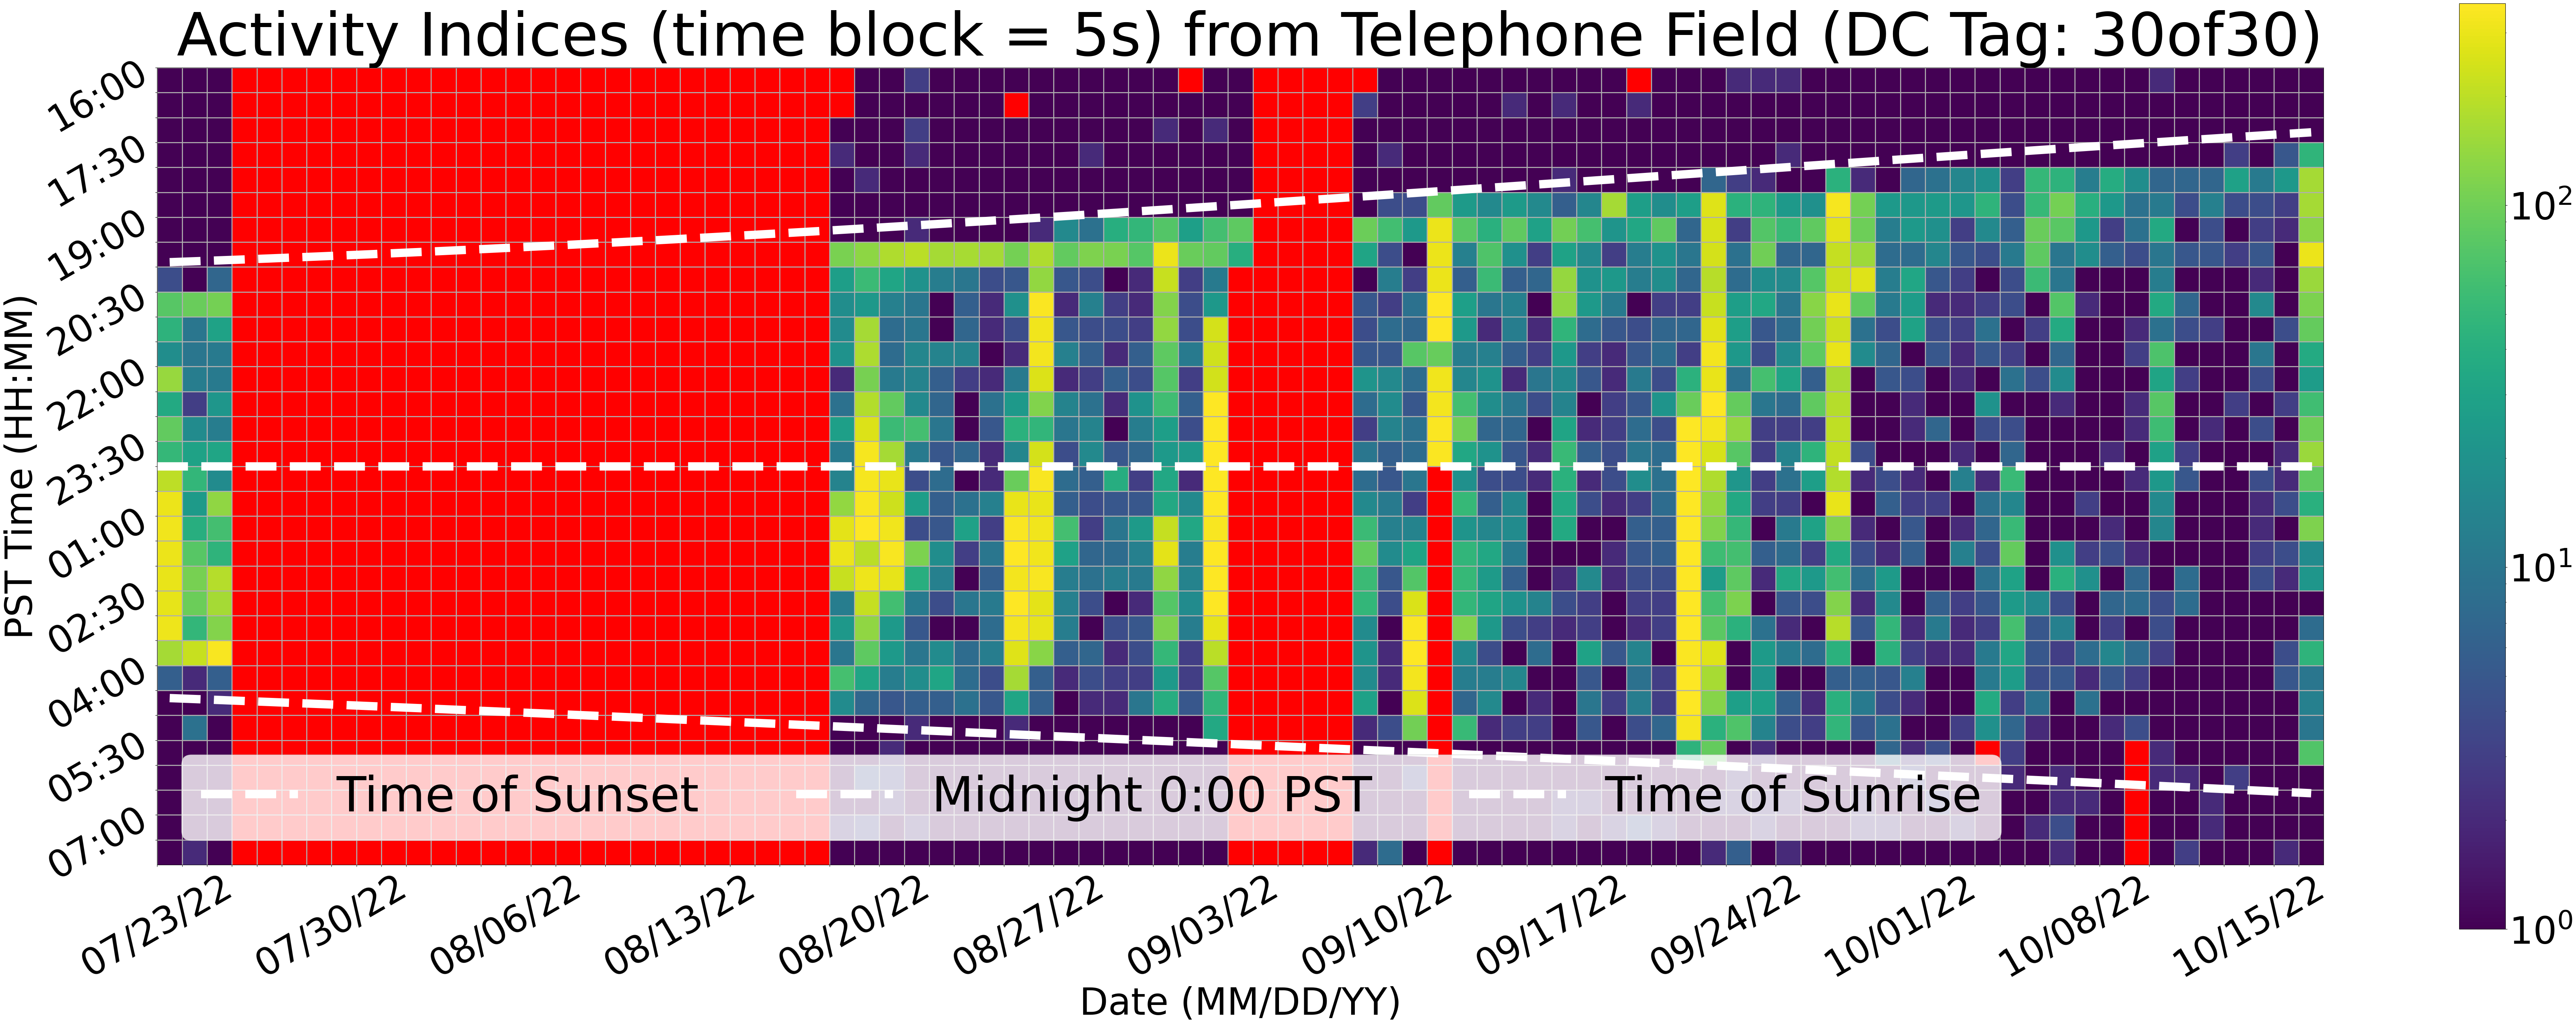

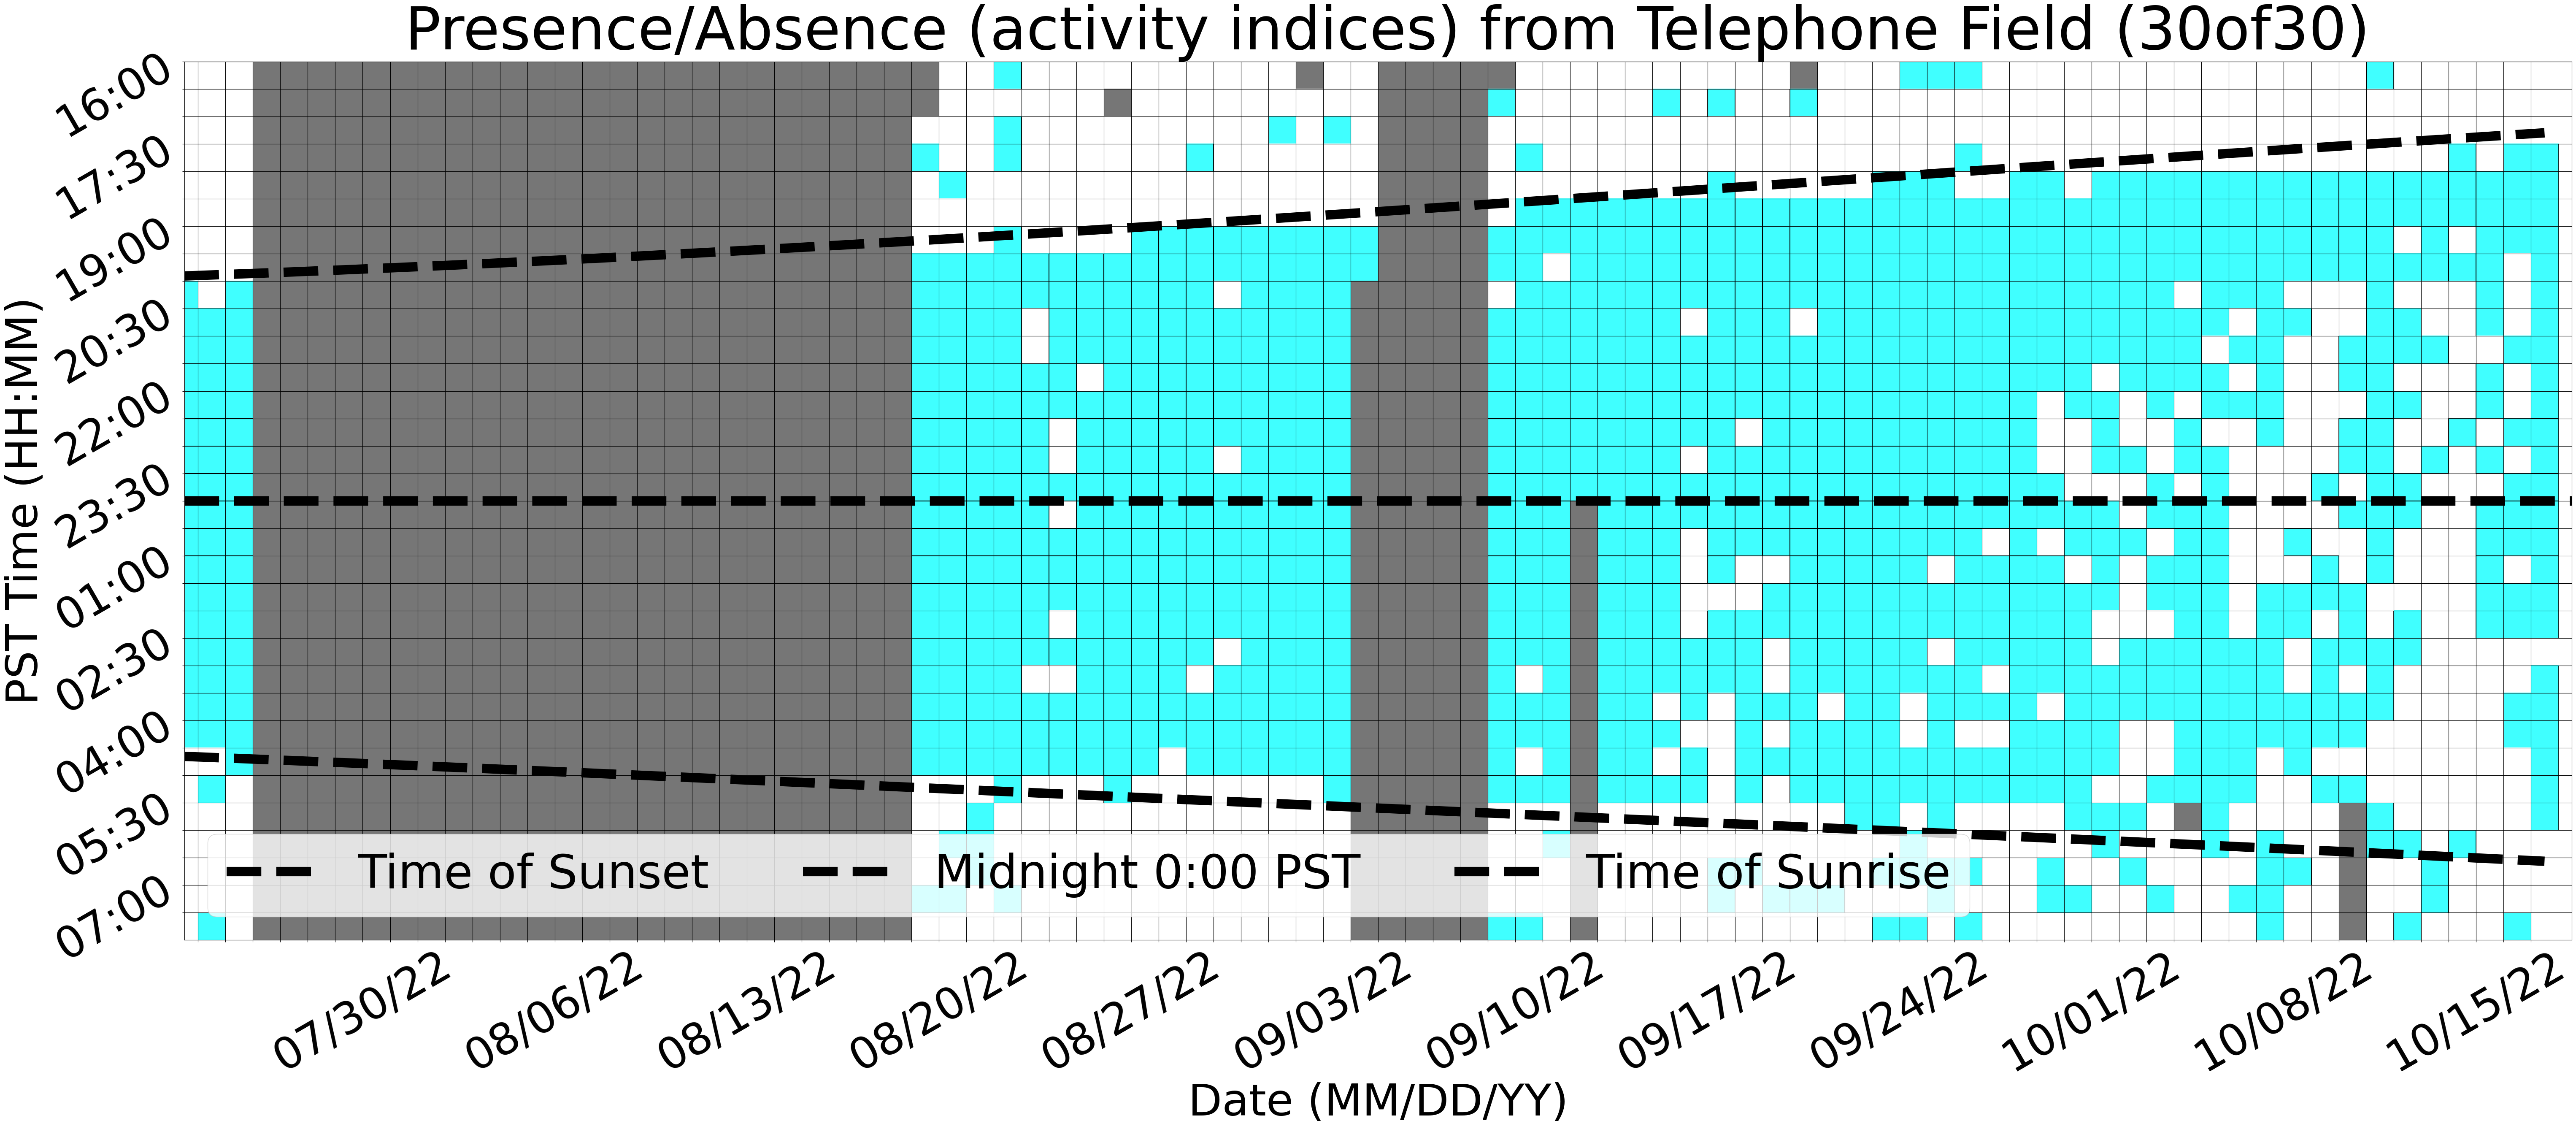

Telephone LF1


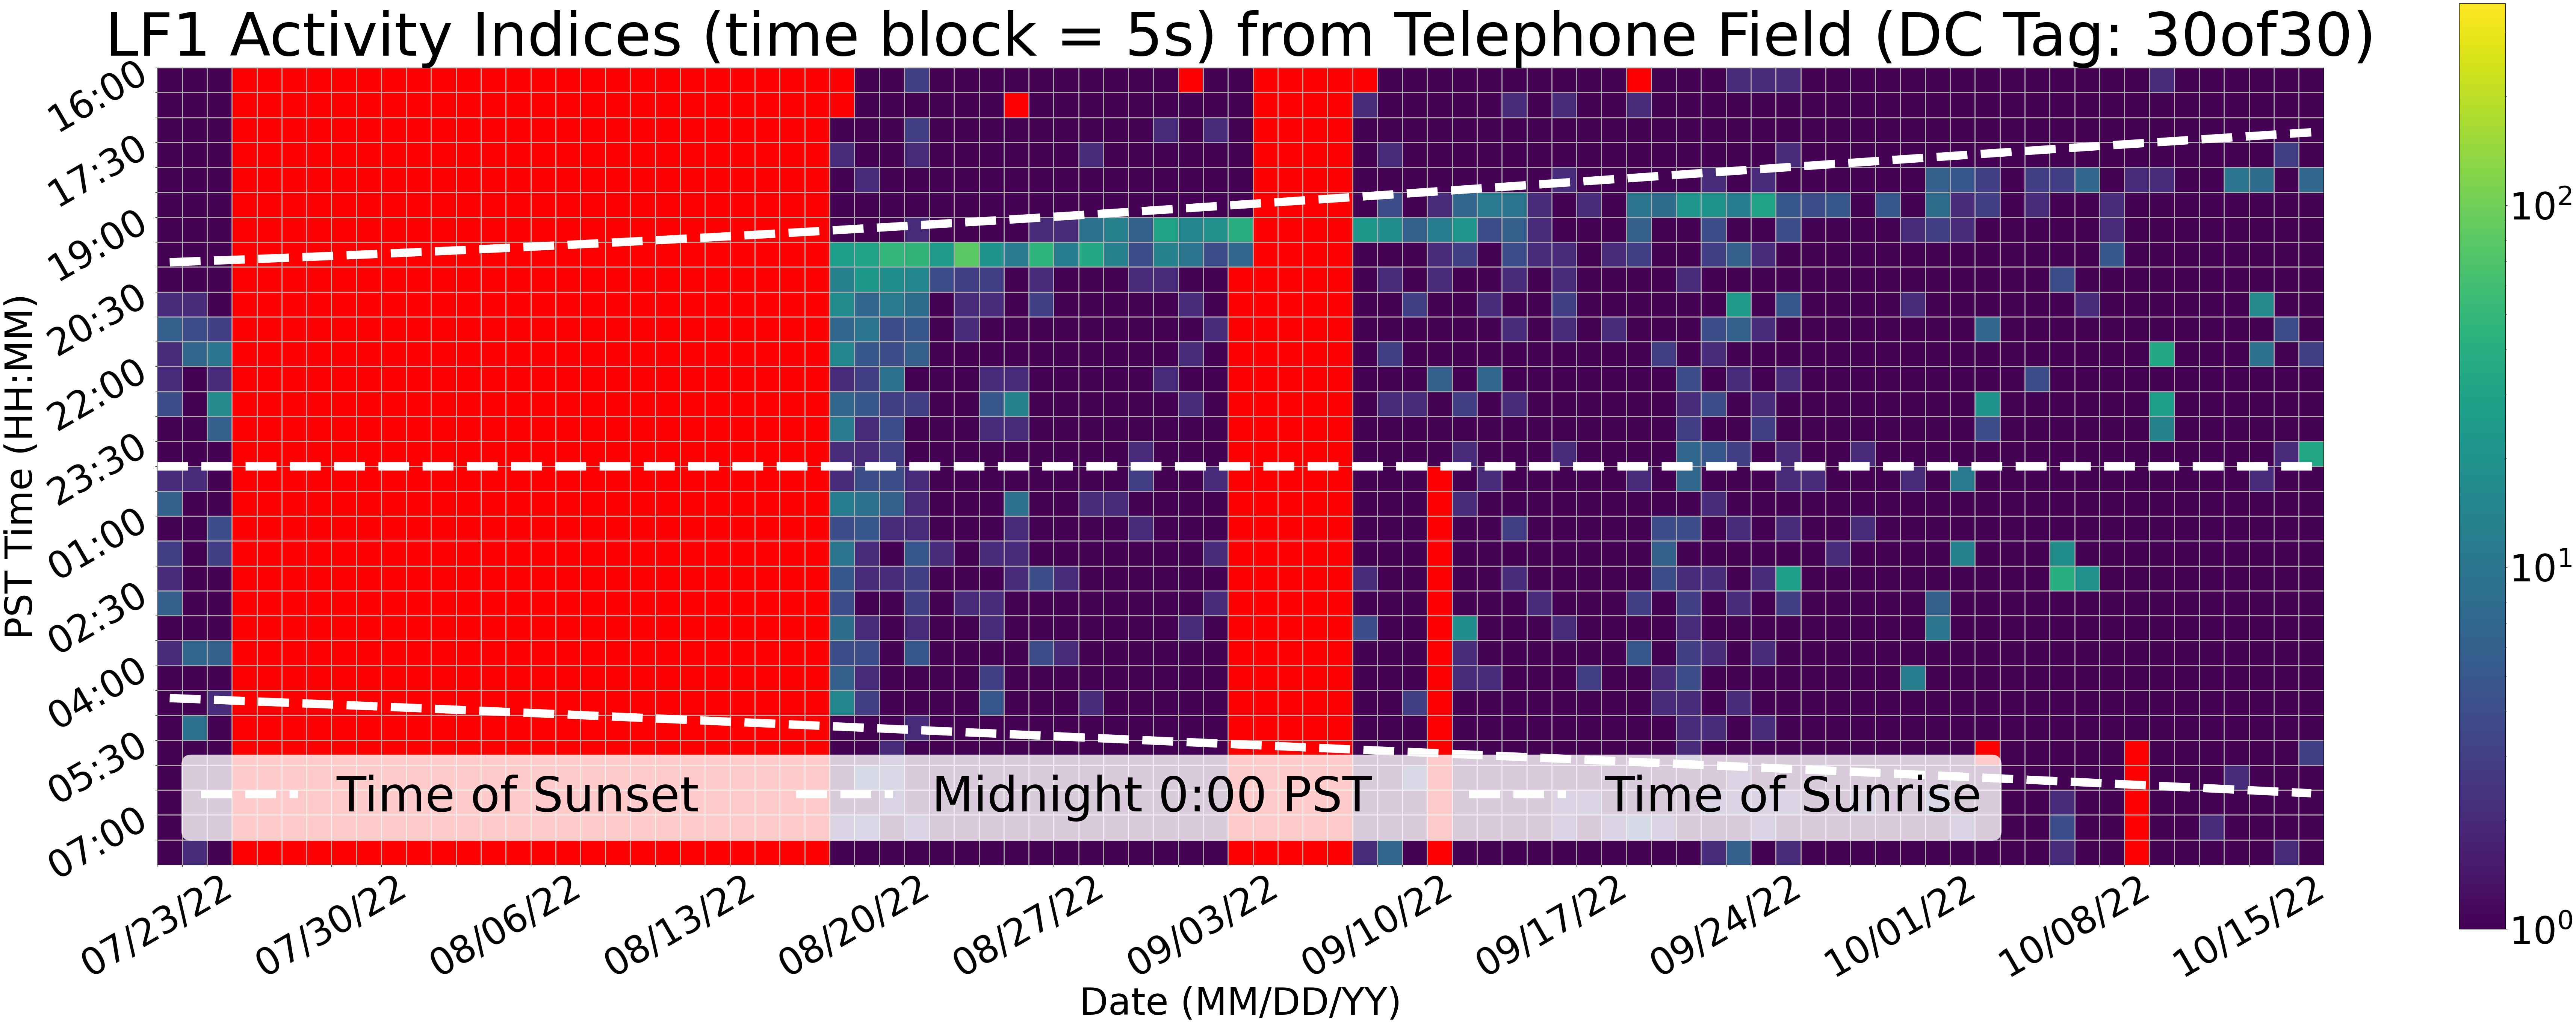

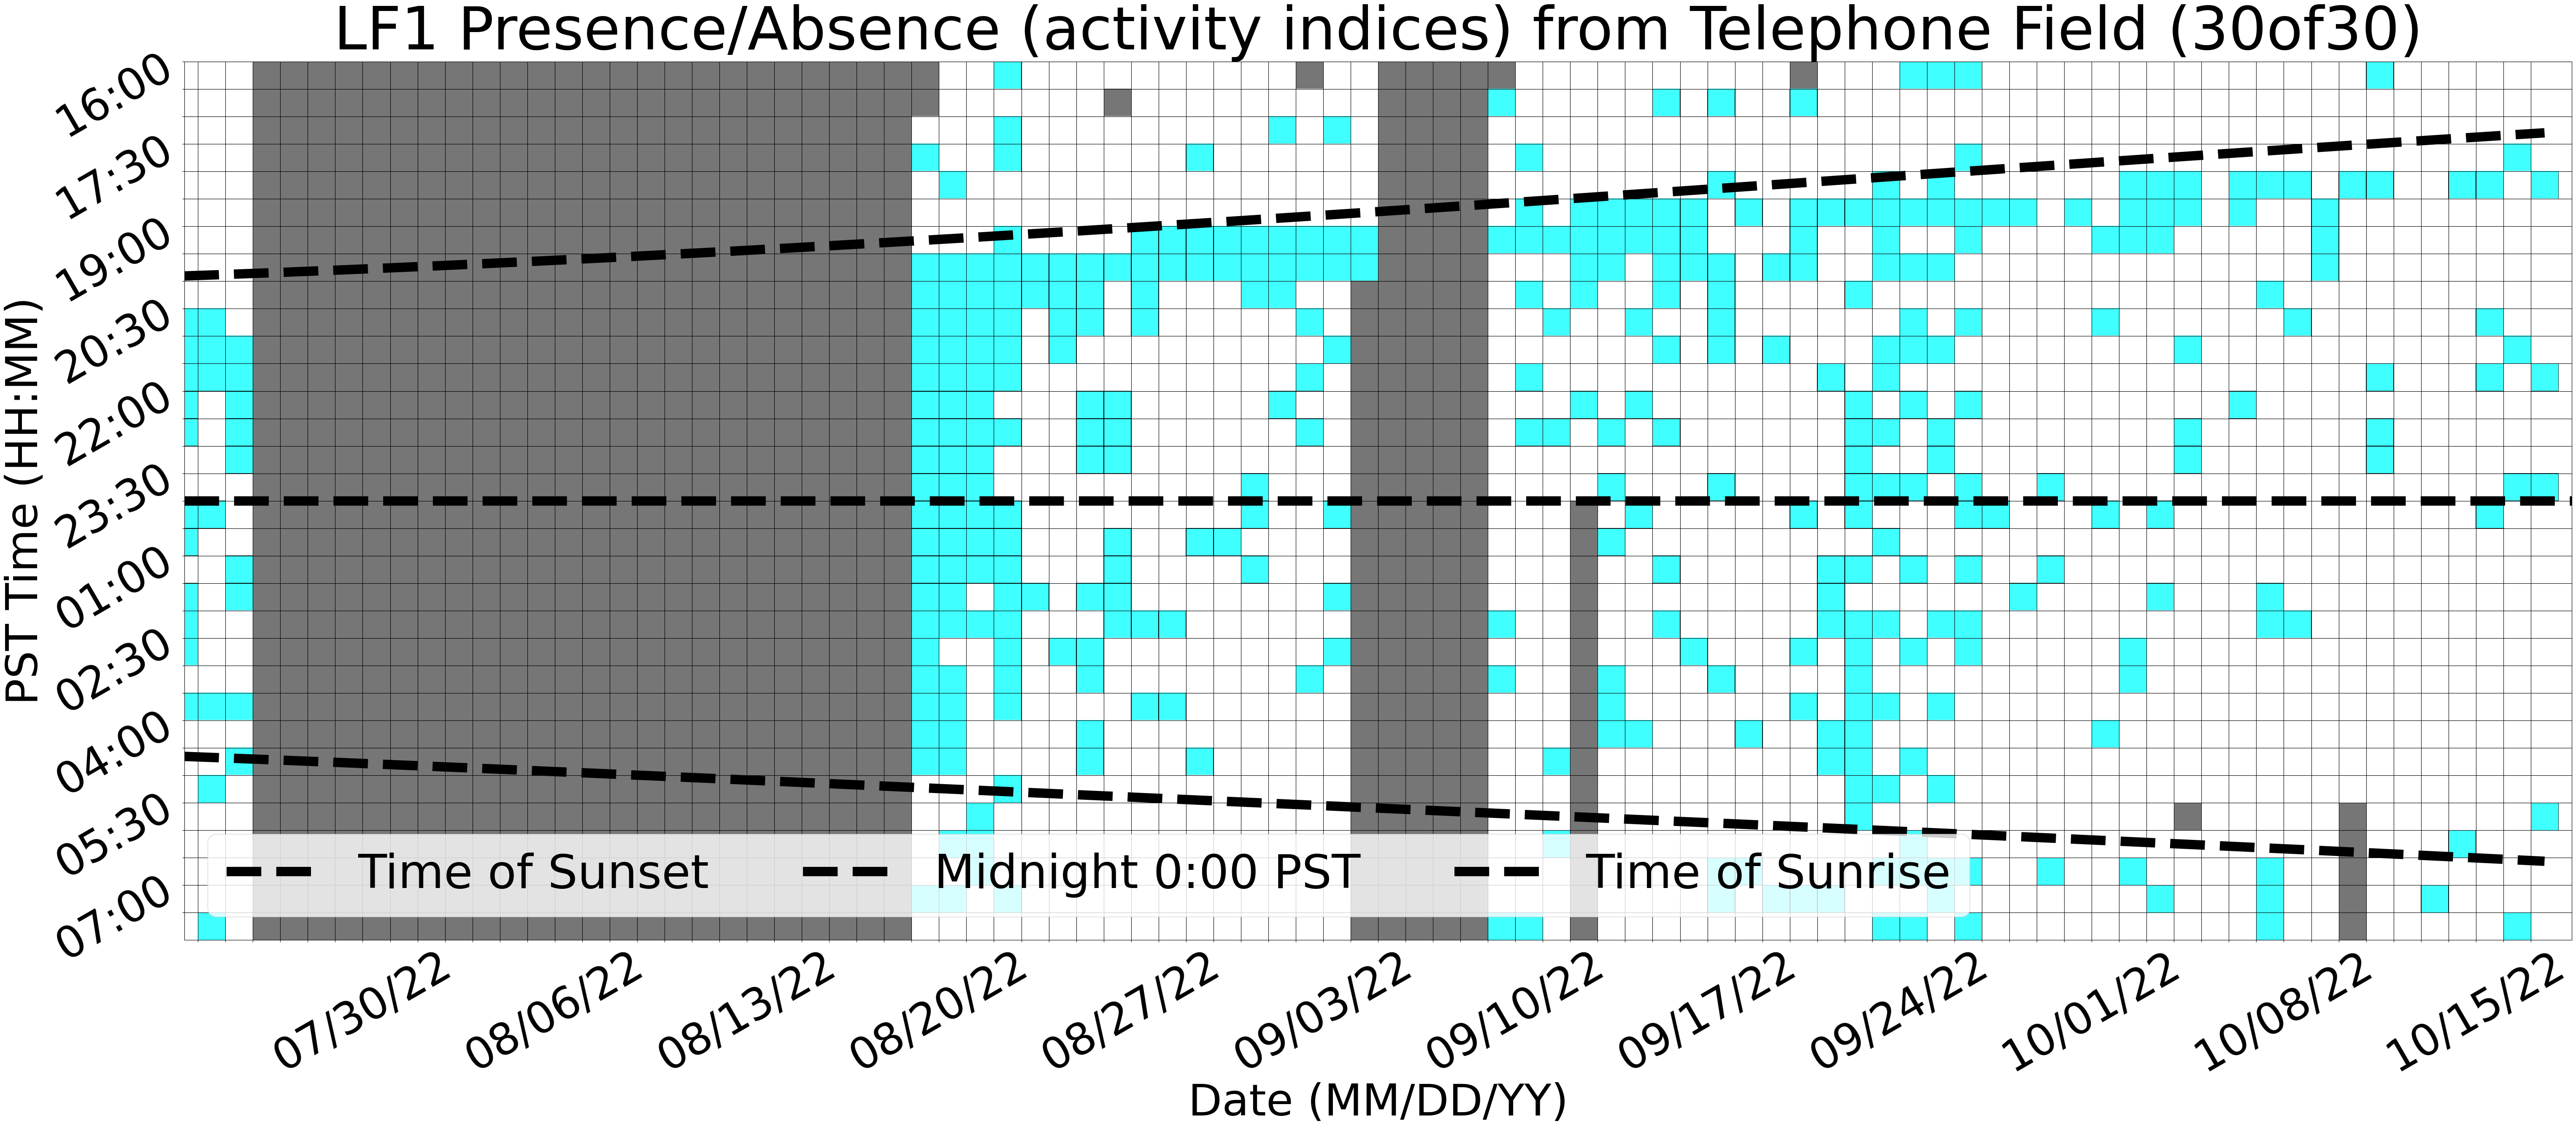

Telephone HF1


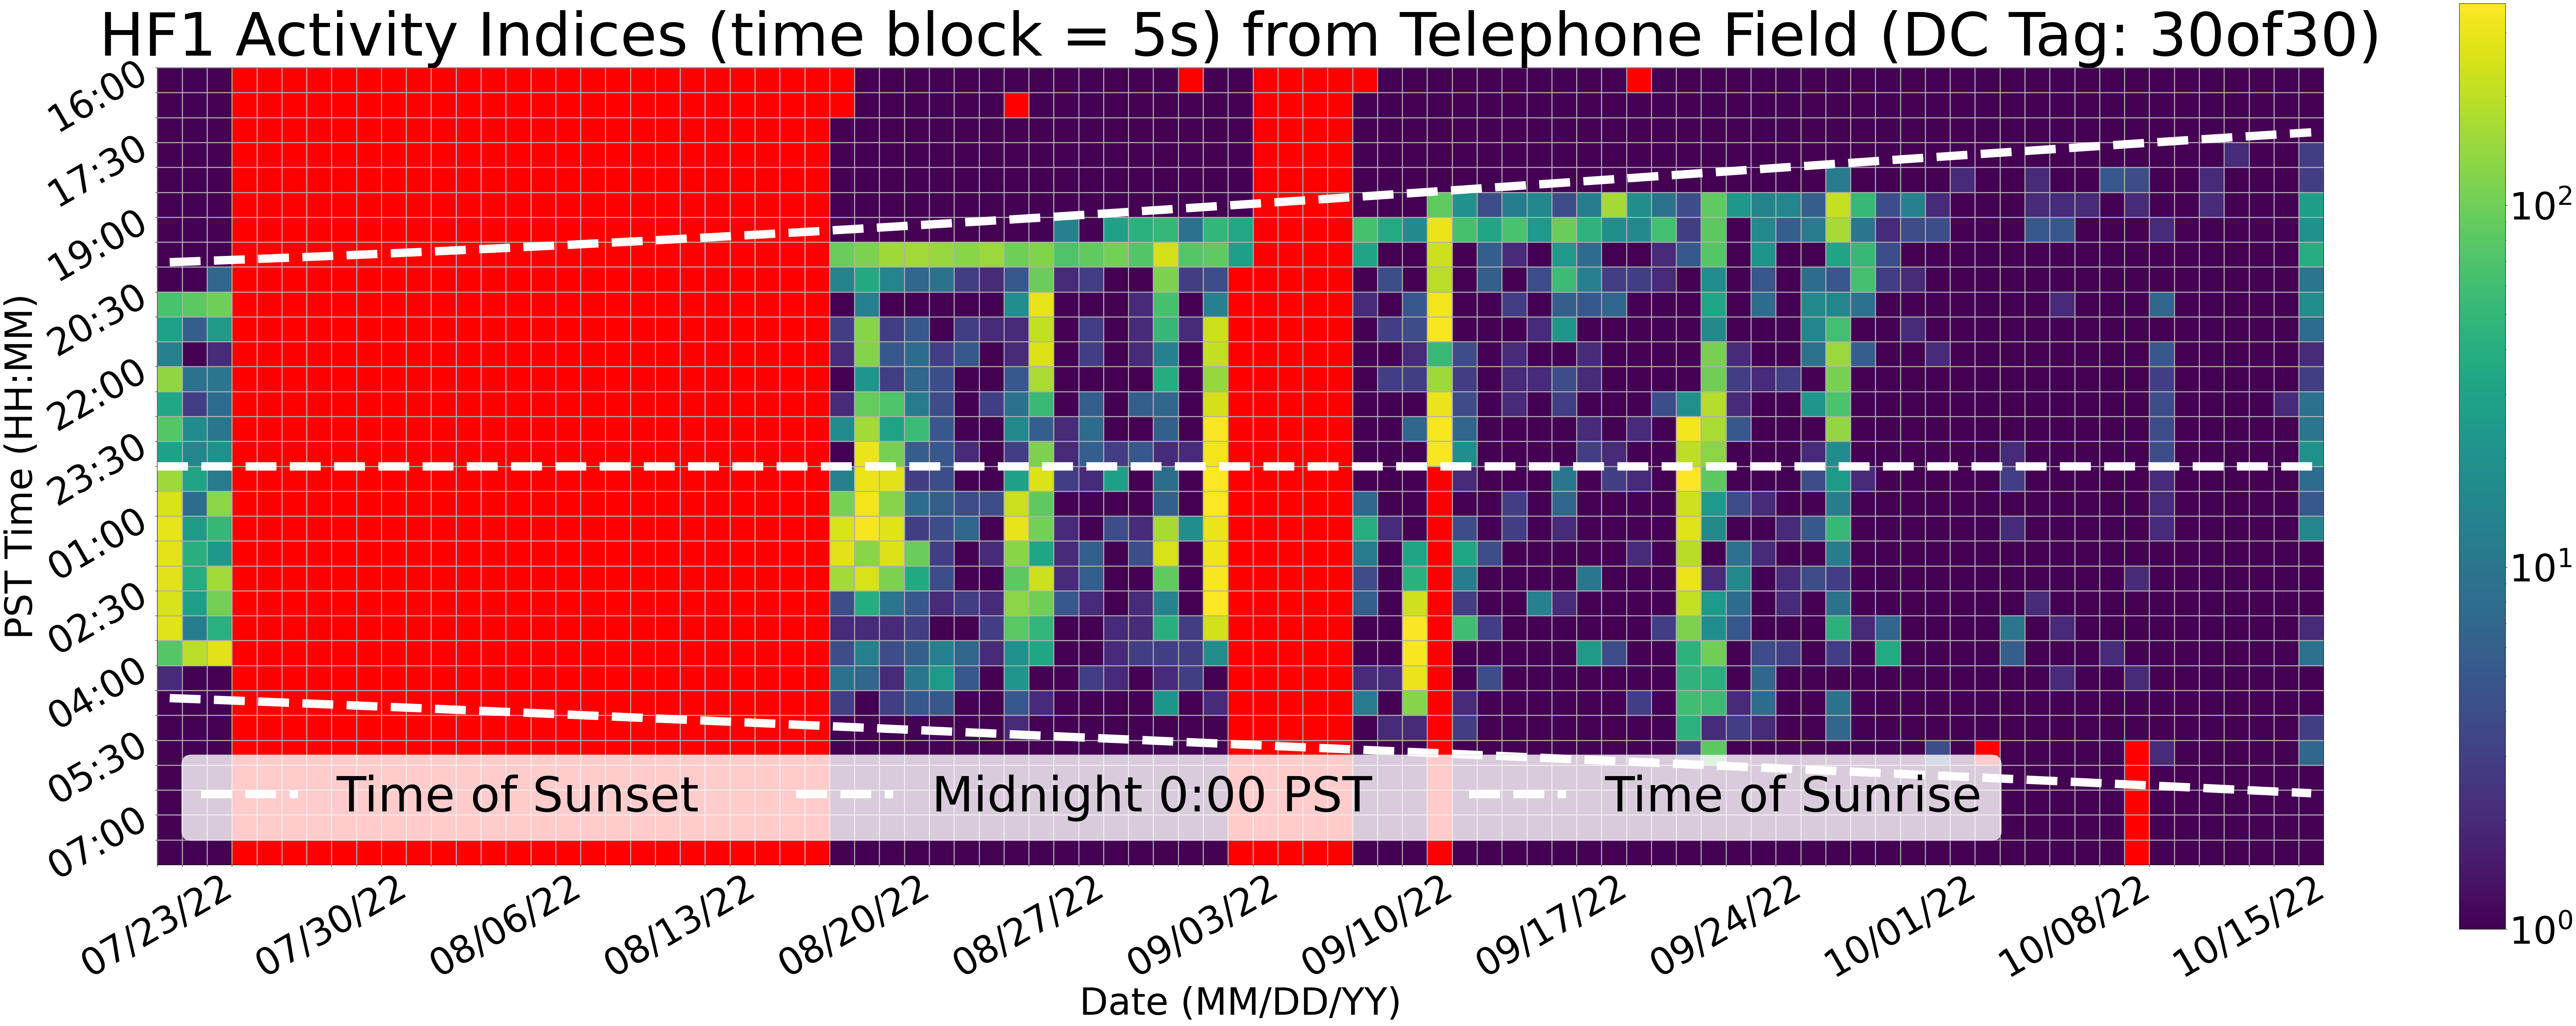

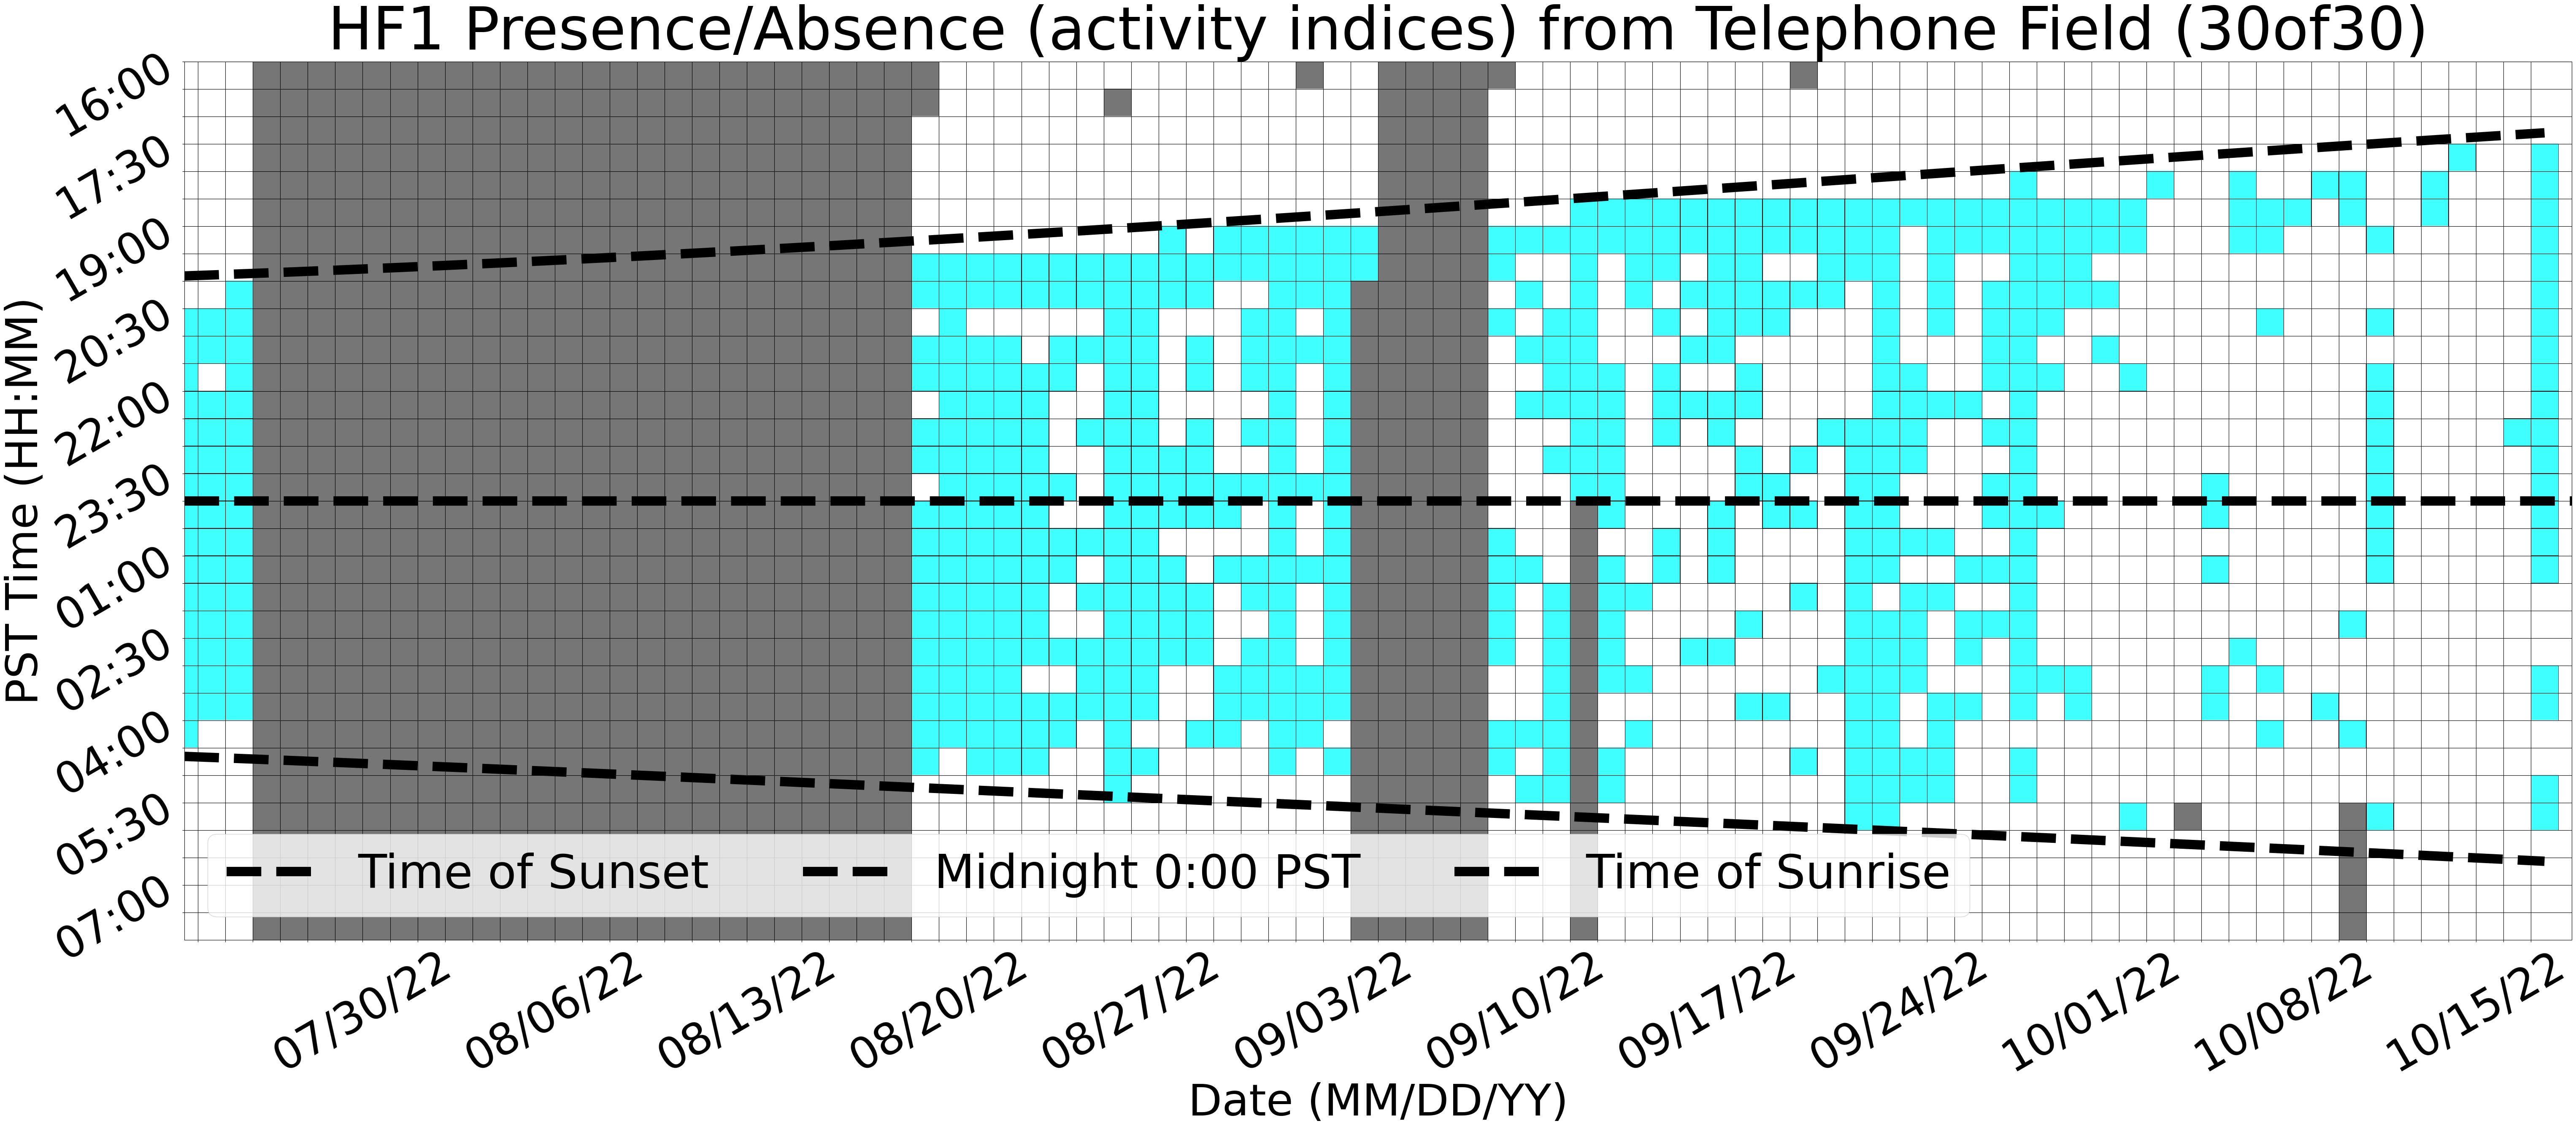

Telephone HF2


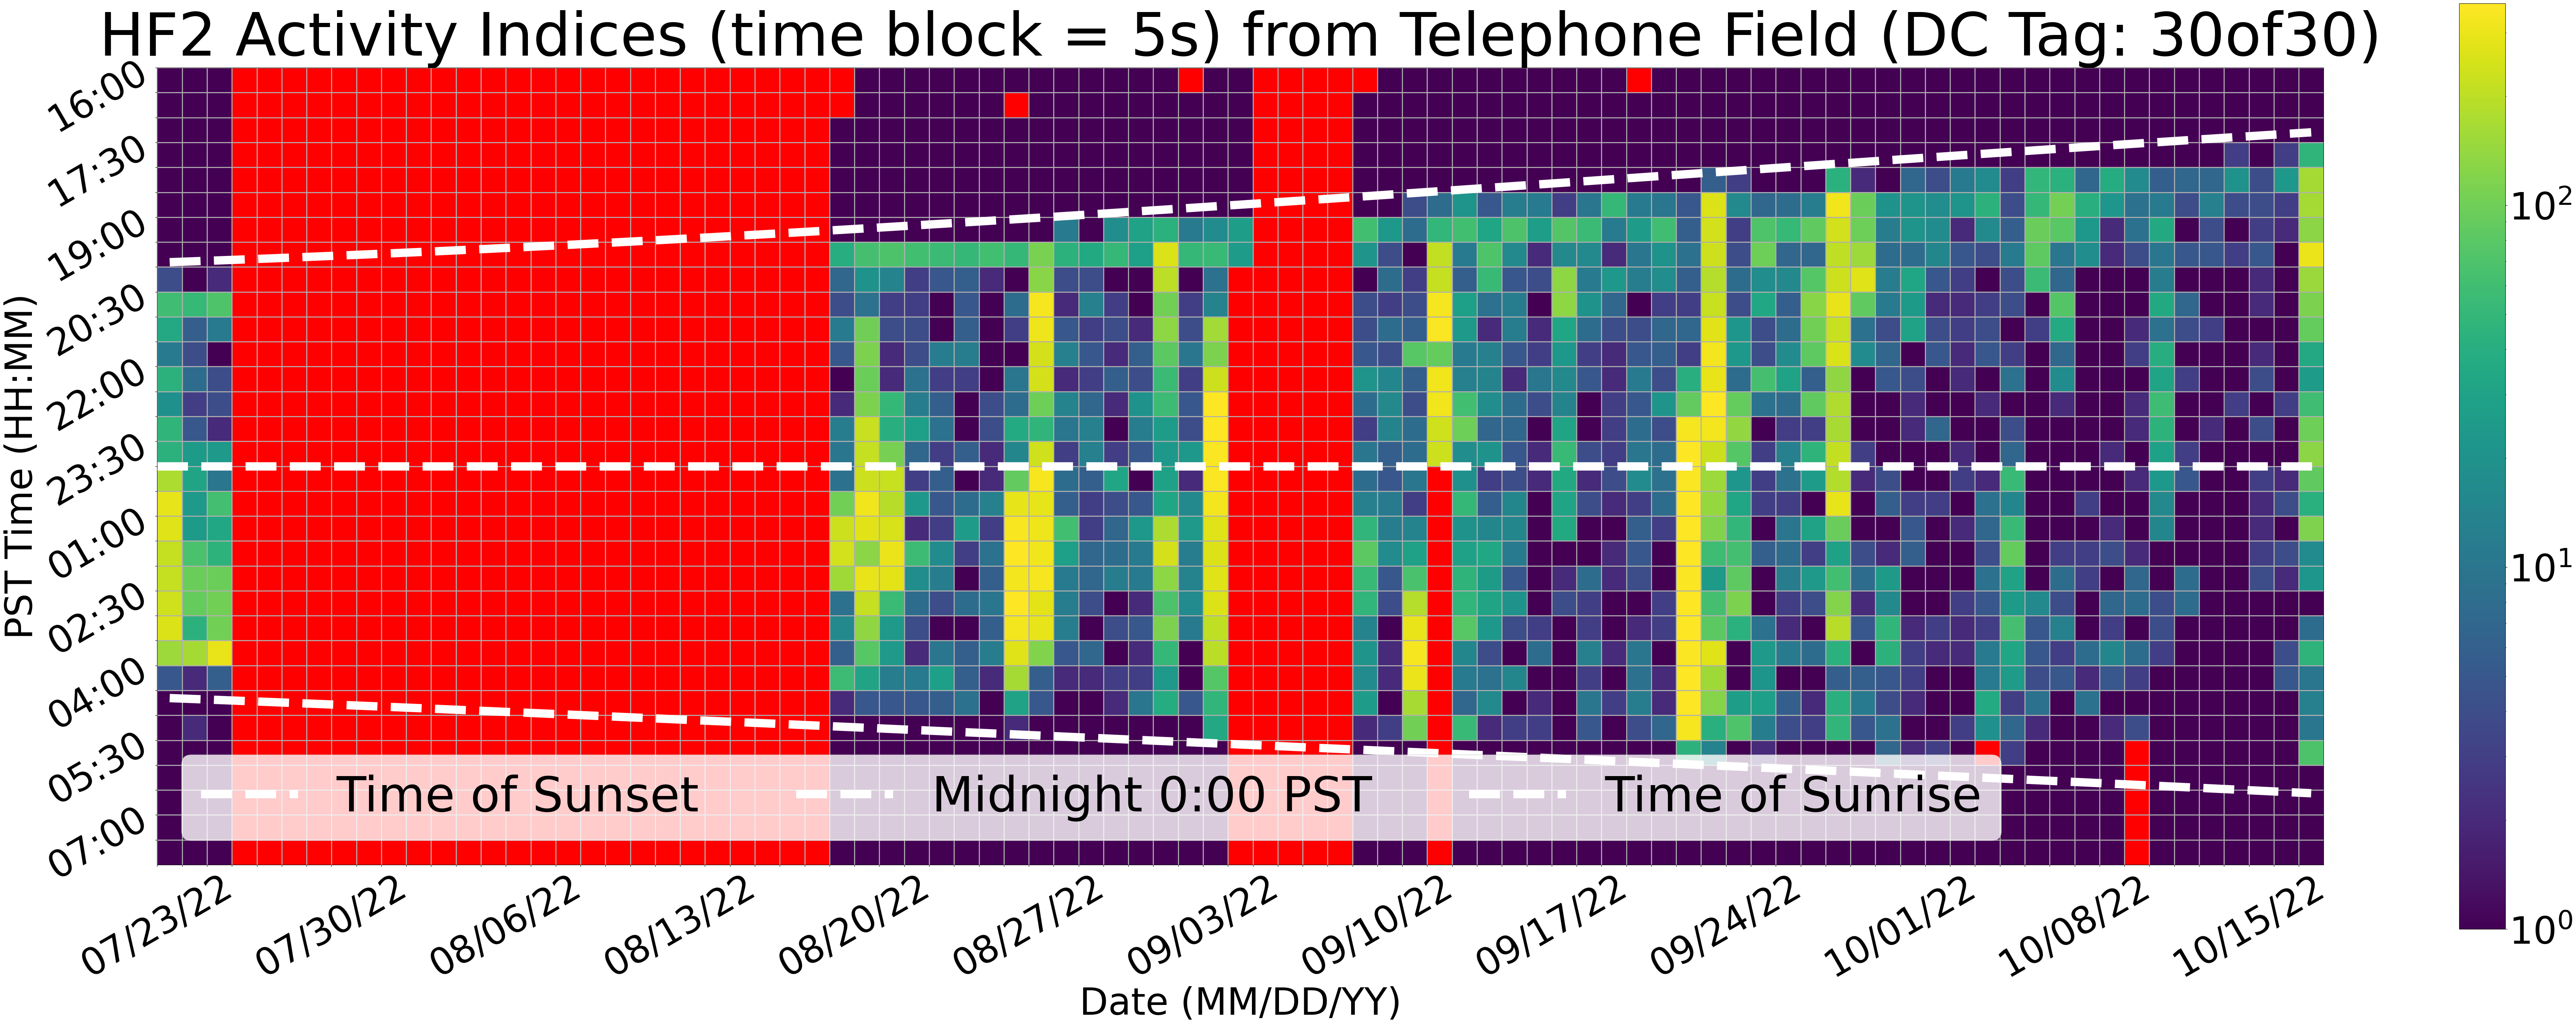

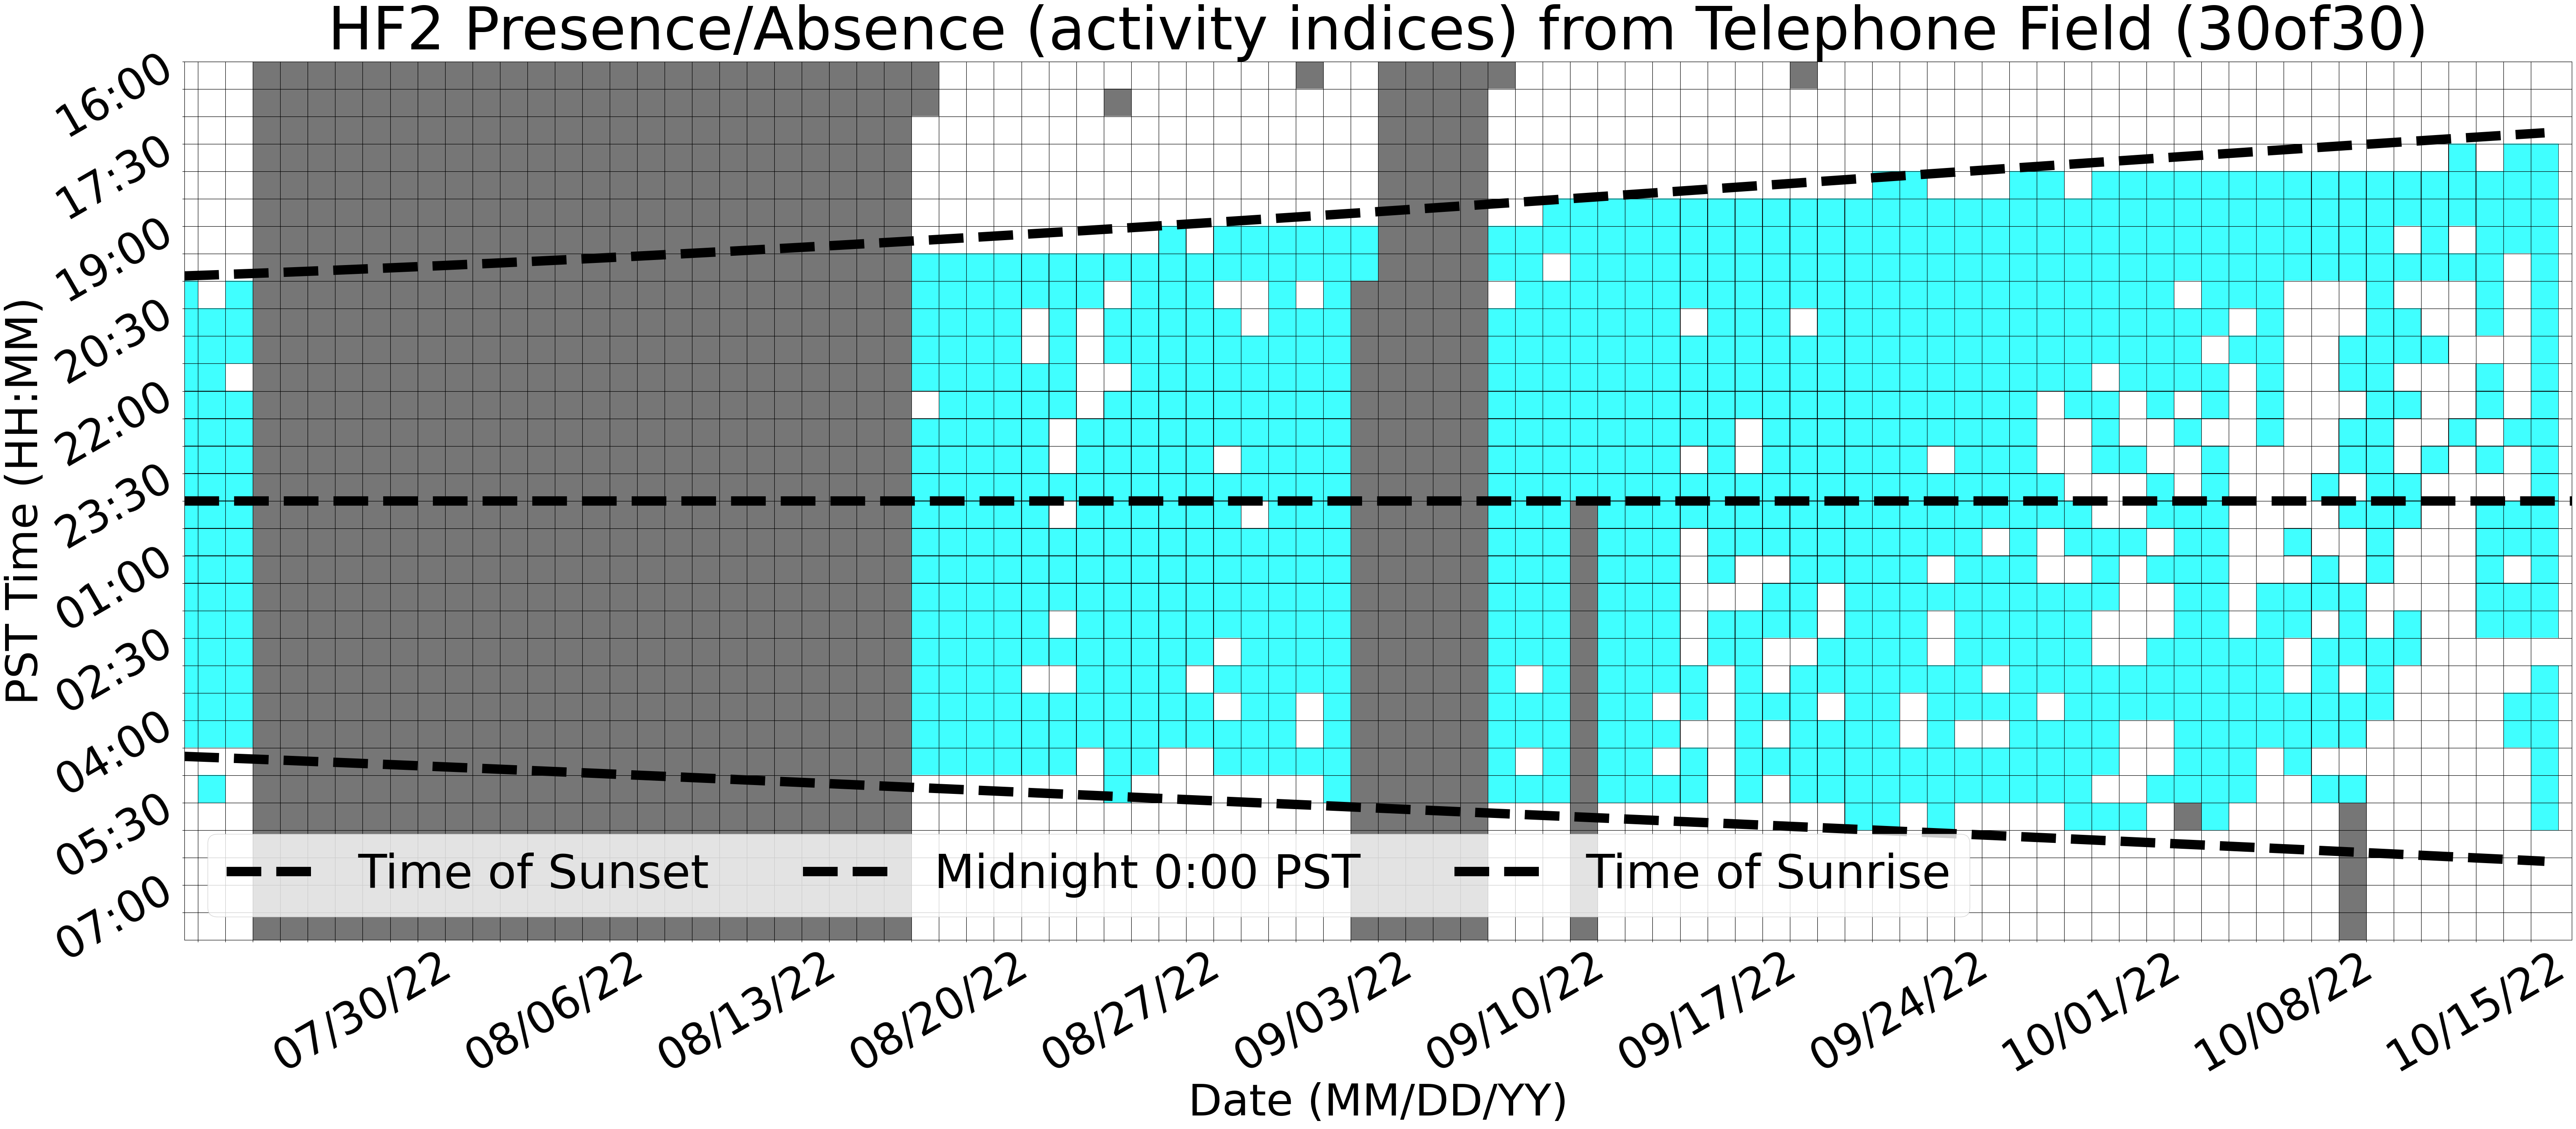

In [4]:
cycle_lengths = [30, 6]
percent_ons = [1/6]
specific_dc_tag = "30of30"

pipeline_params = dict()
pipeline_params['assemble_location_summary'] = False
pipeline_params["read_csv"] = False
pipeline_params["save_activity_grid"] = False
pipeline_params["save_presence_grid"] = False
pipeline_params["save_dc_night_comparisons"] = False
pipeline_params["save_activity_dc_comparisons"] = False
pipeline_params["save_presence_dc_comparisons"] = False
pipeline_params["show_plots"] = True
pipeline_params["show_PST"] = True

data_params = dict()
data_params["cycle_lengths"] = cycle_lengths
data_params["percent_ons"] = percent_ons
dc_tags = ss.get_list_of_dc_tags(data_params["cycle_lengths"], data_params["percent_ons"])
data_params["dc_tags"] = dc_tags
data_params["cur_dc_tag"] = specific_dc_tag
data_params['bin_size'] = '30'
data_params['index_time_block_in_secs'] = '5'
data_params['recording_start'] = '00:00'
data_params['recording_end'] = '16:00'

site_keys = ['Telephone']
for site_key in site_keys:
    for type_key in FREQ_GROUPS[site_key].keys():
        print(site_key, type_key)

        data_params["site_name"] = SITE_NAMES[site_key]
        data_params["site_tag"] = site_key
        data_params["type_tag"] = type_key

        file_paths = get_file_paths(data_params)

        activity_inds_arr = pipeline.run_for_inds(data_params, pipeline_params, file_paths)
        plot.plot_activity_grid_for_inds(activity_inds_arr, data_params, pipeline_params, file_paths)
        plot.plot_presence_grid(activity_inds_arr, data_params, pipeline_params, file_paths)